# Further analysis

In [7]:
import pandas as pd
import os
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Reading data

In [8]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()

In [9]:
df = pd.read_csv(os.path.join(p_cwd, "data","phen_data_further_analysis.csv"), parse_dates = ['date'])
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


## Preliminary analysis

In [10]:
df.dtypes

s_id                    int64
lon                   float64
lat                   float64
alt                     int64
alt_dem                 int64
gss_id                  int64
genus                  object
species                object
phase_id                int64
year                    int64
day                     int64
date           datetime64[ns]
cult_season             int64
dtype: object

In [11]:
df= df.rename({'day': 'day_year'}, axis=1)
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day_year,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


In [12]:
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.drop('date', axis=1, inplace=True)

In [13]:
#reordering the df columns
df = df[['s_id','lon','lat','alt','alt_dem','gss_id','genus','species','phase_id','year','month','day','day_year','cult_season']]
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,month,day,day_year,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,1,2,2,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,1,5,5,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,1,6,6,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,1,7,7,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,1,10,10,0


In [14]:
df.groupby(by=['genus', 'species']).size()

genus           species                
Acer            Acer platanoides           100917
Aesculus        Aesculus hippocastanum     599214
Alnus           Alnus glutinosa            179802
Alopecurus      Alopecurus pratensis        72850
Ambrosia        Ambrosia artemisiifolia         2
Anemone         Anemone nemorosa           127141
Artemisia       Artemisia vulgaris          29782
Avena           Avena sativa               315963
Beta            Beta vulgaris              279484
Betula          Betula pendula             314304
                Betula pubescens             1593
Calluna         Calluna vulgaris            97713
Colchicum       Colchicum autumnale         60060
Cornus          Cornus mas                   6871
Corylus         Corylus avellana           118844
Dactylis        Dactylis glomerata         119918
Fagus           Fagus sylvatica            331106
Forsythia       Forsythia suspensa         110671
Fraxinus        Fraxinus excelsior         169409
Galanthus 

In [15]:
species = pd.DataFrame(df.groupby(by='species').first().reset_index())

In [16]:
df_species = species[['species','gss_id']]

In [17]:
df_species.to_csv(os.path.join(p_cwd, "output","printouts","species_gss_id_csv")) #extracting the gss_id values for the species

In [18]:
df.drop('genus', axis=1, inplace=True)
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,species,phase_id,year,month,day,day_year,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia platyphyllos,60,1951,1,2,2,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus avellana,60,1951,1,5,5,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus avellana,60,1951,1,6,6,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus avellana,60,1951,1,7,7,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus nivalis,60,1951,1,10,10,0


In [19]:
df_phases = pd.DataFrame(df.groupby(by =['s_id','phase_id','species']).agg({'day_year':['count','mean','median','min', 'max']}))

In [20]:
df_phases.dtypes

day_year  count       int64
          mean      float64
          median    float64
          min         int64
          max         int64
dtype: object

In [21]:
df_phases

day_year                             
                                         count        mean median  min  max
s_id  phase_id species                                                     
1     0        Avena sativa                  8   95.625000   98.0   62  122
               Beta vulgaris                 8  109.000000  107.5   95  122
               Hordeum vulgare              17  174.647059  114.0   78  281
               Triticum aestivum             7  281.142857  287.0  262  288
               Zea mays                      6  129.333333  129.0  118  140
...                                        ...         ...    ...  ...  ...
21532 205      Aesculus hippocastanum        1  275.000000  275.0  275  275
               Betula pendula                1  290.000000  290.0  290  290
               Fagus sylvatica               1  291.000000  291.0  291  291
               Larix decidua                 1  300.000000  300.0  300  300
      286      Aesculus hippocastanum        1  260.000000  260.0  260  260

[602368 rows x 5 columns]

In [22]:
col_to_drop = ['lon', 'lat', 'alt', 'alt_dem', 'gss_id']
df_nogis = df.drop(col_to_drop, axis=1)

In [23]:
df_nogis

,s_id,species,phase_id,year,month,day,day_year,cult_season
0,5144,Tilia platyphyllos,60,1951,1,2,2,0
1,2255,Corylus avellana,60,1951,1,5,5,0
2,1967,Corylus avellana,60,1951,1,6,6,0
3,4014,Corylus avellana,60,1951,1,7,7,0
4,512,Galanthus nivalis,60,1951,1,10,10,0
...,...,...,...,...,...,...,...,...
10793110,1876,Avena sativa,100,1963,9,1,244,1
10793111,1904,Prunus domestica,87,1963,9,1,244,0
10793112,1921,Colchicum autumnale,60,1963,9,1,244,0
10793113,1924,Colchicum autumnale,60,1963,9,1,244,0


In [42]:
lst_species= df_nogis['species'].unique().tolist()
len(lst_species)

55

In [43]:
num_list=[i for i in range(0,55,1)]
species_corresp_dict = dict(zip(lst_species,num_list)) 
species_corresp_dict

{'Tilia platyphyllos': 0,
 'Corylus avellana': 1,
 'Galanthus nivalis': 2,
 'Salix caprea': 3,
 'Aesculus hippocastanum': 4,
 'Alnus glutinosa': 5,
 'Ribes uva-crispa L.': 6,
 'Anemone nemorosa': 7,
 'Forsythia suspensa': 8,
 'Tussilago farfara': 9,
 'Hordeum vulgare': 10,
 'Avena sativa': 11,
 'Dactylis glomerata': 12,
 'Taraxacum officinale': 13,
 'Prunus persica': 14,
 'Betula pendula': 15,
 'Prunus spinosa': 16,
 'Beta vulgaris': 17,
 'Ribes rubrum': 18,
 'Fraxinus excelsior': 19,
 'Prunus padus': 20,
 'Acer platanoides': 21,
 'Rubus idaeus': 22,
 'Larix decidua': 23,
 'Syringa vulgaris': 24,
 'Prunus domestica': 25,
 'Triticum aestivum': 26,
 'Tilia cordata': 27,
 'Zea mays': 28,
 'Picea abies': 29,
 'Fagus sylvatica': 30,
 'Solanum tuberosum': 31,
 'Philadelphus coronarius': 32,
 'Symphoricarpos albus': 33,
 'Prunus cerasus': 34,
 'Pinus sylvestris': 35,
 'Sorbus aucuparia': 36,
 'Robinia pseudoacacia': 37,
 'Rubus rubus': 38,
 'Colchicum autumnale': 39,
 'Quercus robur': 40,
 'V

In [46]:
df_nogis.replace({'species':species_corresp_dict}, inplace=True)

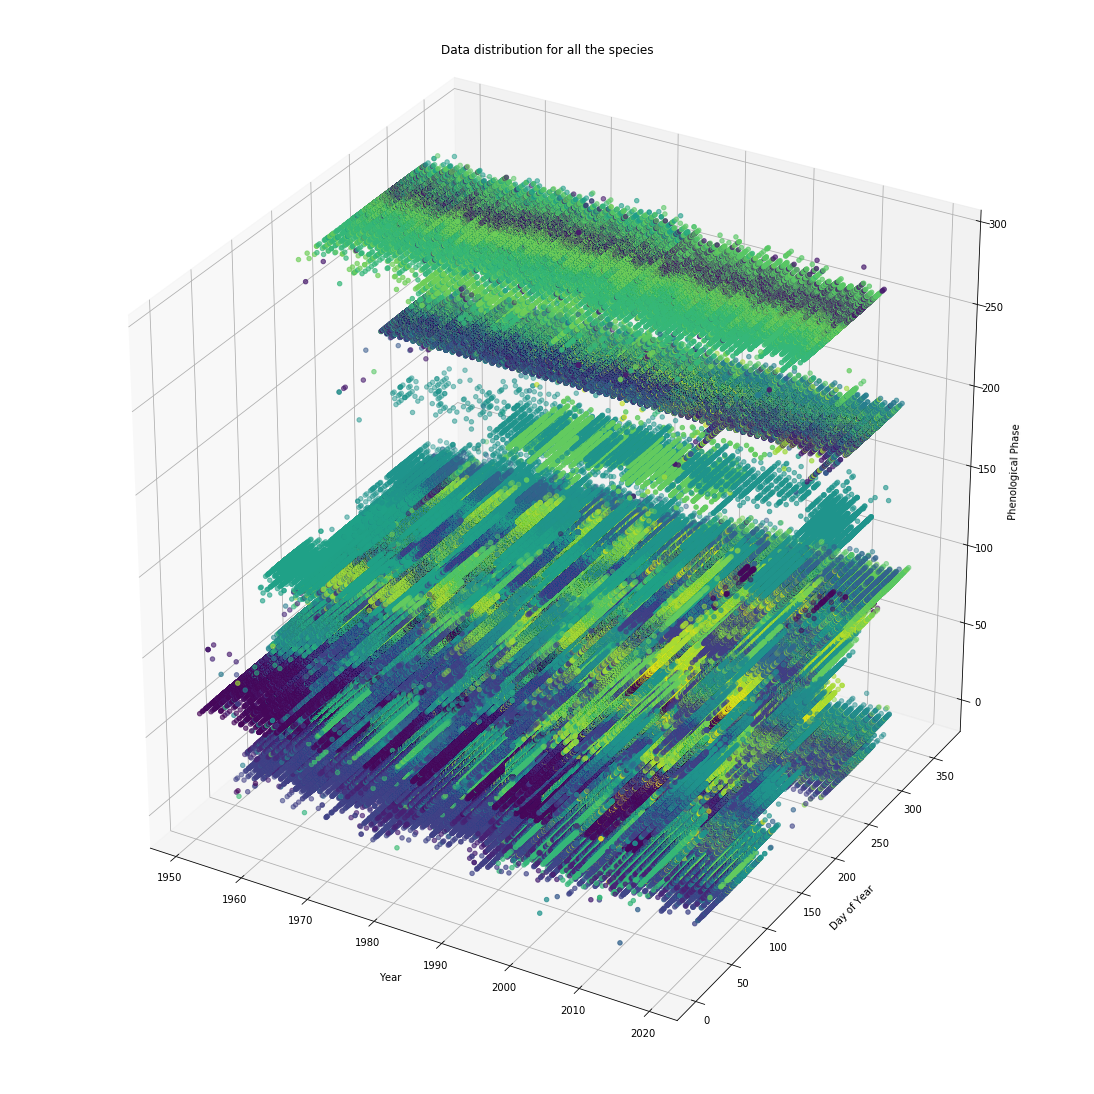

In [47]:
# 3D-Scatterplot


fig = plt.figure(figsize=(15,15))
ax=Axes3D(fig)


xs = df_nogis['year']
ys = df_nogis['day_year']
zs =df_nogis['phase_id']
ax.scatter(xs, ys, zs, c=df_nogis['species'])
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Day of Year', labelpad=10)
ax.set_zlabel('Phenological Phase', labelpad=10)

plt.title("Data distribution for all the species", pad=40)
plt.show()

In [49]:
fig.savefig(os.path.join(p_cwd, "output","images","all_species_plot.jpg"), dpi=300,
        orientation='portrait')